<Body>   
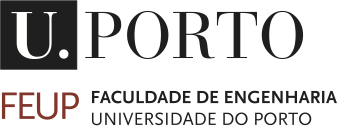   
<h1> <b>Machine Learning 2022/2023 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Daniel Costa** (danielgcosta@fe.up.pt),
**Rui Gonçalves** (rjpg@fe.up.pt)

FEUP, Feb. 2023

---


# **Project #01**

**Note:** This is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform. 

**Deadlines:** Present the state of your work (and answer questions) on the week of **March 27** in your corresponding practical class. Upload the files until 23:59 of **April 7, 2023**.


---



In [ ]:
# To make a nice pdf file of this file, you have to do the following:
# - upload this file into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "ML_project1.ipynb"
# Then just download the html file and print it to pdf!

# **Identification**

* **Group:** xx
* **Name:** xxx
* **Student Number:**

* **Name:**
* **Student Number:**


---




**Initial setup:** To download the file **data-set.cvs**, run the next cell.

In [38]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/9y0s2ogjovkwrbm/data-set.csv.zip?dl=0 --quiet
!unzip dataset.csv.zip -d. 


Archive:  dataset.csv.zip
replace ./data-set.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [91]:
# Then, run this code to get the data-set

import pandas as pd
df = pd.read_csv('data-set.csv', index_col=0)
df
#df

# By convention, values that are zero signify no measurements.
# The units are:
# [m] for x and y
# [m/s] for the velocities vx and vy
# [m] for the LIDAR ranges

,time,x,y,vx,vy,angle -179,angle -178,angle -177,angle -176,angle -175,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,0.0,-3.946339,-2.912177,0.711051,-0.307325,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,0.000000,0.000000,0.678366,-0.308563,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.000000,0.000000,0.677682,-0.285029,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3,0.000000,0.000000,0.648523,-0.293170,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4,0.000000,0.000000,0.644965,-0.277222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,49.5,3.855108,-3.928327,-0.078142,-0.093745,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,49.6,0.000000,0.000000,-0.088140,-0.103430,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,49.7,0.000000,0.000000,-0.078002,-0.092986,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,49.8,0.000000,0.000000,-0.076514,-0.091199,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Part 1: Kalman filter design**



Consider a holonomic mobile robot in the 2D plan and suppose that one can get measurements from its linear velocity every time step $t=0, 0.1, 0.2, \ldots$ (in seconds) and its position every time step $t=0, 0.5, 1.0, 1.5 \ldots$ (in seconds). Suppose also that the measurements are corrupted by additive Gaussian noise and furthermore, the linear velocity measurements may also include a unknown but constant bias term. The goal is to obtain an estimate of the position of the robot together with a measure of its uncertainty. To this end, we will implement a Kalman filter (KF)!
 
### **Model:**
Let $(x_t, y_t)$ be the position of the robot at time step $t$, and $(v_{x,t}, v_{y,t})$ its linear velocity. Let $(b_{x,t}, b_{y,t})$ be the bias term and $w_t$ and $\eta_t$ Gaussian noises. Then, a state-space model to design the KF can be written as


*x-direction*
\begin{align*}
\begin{bmatrix}
x_{t+1} \\
b_{x,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{x,t}
+ w_{x,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{x,t} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix} +  \eta_{x,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}

*y-direction*
\begin{align*}
\begin{bmatrix}
y_{t+1} \\
b_{y,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{y,t}
+ w_{y,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{y,t} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix} +  \eta_{y,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}
where $(z_{x,t}, z_{y,t})$ is the output vector and $h=0.1\,s$ is the sample time.

**Note:** We have decomposed the model in two decoupled parts (x and y directions). Thus, it is possible to design a KF for each direction.

**1.1** 
Implement 2 KFs (one for each direction) and display the evolution along time of the estimated position of the robot and the estimated bias term. Display also the estimated trajectory 2D.

In [92]:
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt

time = df["time"].values
x = df["x"].values
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values


'# v\nchart2 = fig.add_subplot(212)\nchart2.plot(t_time, train_v_time, label=\'train_v\', c="g", linewidth=3, alpha=0.2)\nchart2.plot(t_time,v_time, label=\'v\', c="g")\nchart2.fill_between(t_time,v_dn_time,v_up_time, alpha=0.2, label=\'$v\\pm\\sigma$\')\nchart2.set_ylabel(\'v [m/s]\')\nchart2.set_xlabel(\'t [s]\')\nplt.legend(loc=\'upper left\')\nplt.grid()\nplt.show()\n'

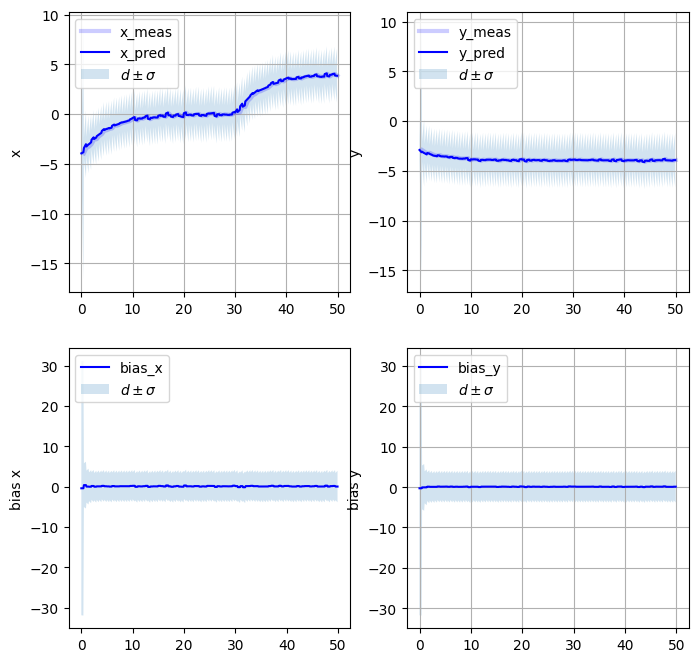

In [93]:

import matplotlib.pyplot as plt
import numpy as np
from numpy import dot 
from numpy import * 
from numpy.linalg import inv 
from numpy.linalg import det
import random
random.seed(3)


# Predict Function
def kf_predict(X, P, A, Q, B, U): 
    """      
      X : The mean state estimate of the previous step (k−1) - shape(m,1) 
      P : The state covariance of previous step (k−1) - shape(m,m) 
      A : The transition  matrix - shape(m,m) 
      Q : The process noise covariance matrix - shape(m,m) 
      B : The input effect matrix - shape(p, m) 
      U : The control input - shape(q,1)
    """ 
    X = A @ X + B @ U 
    P = A @ P @ A.T + Q 
    return(X,P) 

def kf_update(X, P, Y, H, R): 
    """      
      K  : the Kalman Gain matrix 
      IS : the Covariance or predictive mean of Y  
    """
    IS = H @ P @ H.T + R  
    K = P @ H.T @ inv(IS) 
    X = X + K @ (Y- H @ X) 
    P = P - K @ IS @ K.T 
#    P = P - K @ H @ P 
    return (X,P) 

# time step
h = 0.1

# ini state (Position, Bias) = (0,0)

X_x = np.array( [ [0.0] , [0.0]]  ) 
X_y = np.array( [ [0.0] , [0.0]]  ) 

# ini Covar : we start with a very high variance and during it the variance will converge to a lower value
P_x = np.array( [ [ 999.0, 0.0 ] ,
                [ 0.0, 999.0 ] ]  ) 
P_y = np.array( [ [ 999.0, 0.0 ] ,
                [ 0.0, 999.0 ] ]  ) 


# state matrix 
A = np.array( [ [ 1.0, h ] ,
                [ 0.0, 1.0  ] ] )         

# input effect matrix
B = np.array( [ [h], [0] ] )     

# meas matrix
H = np.array( [ [ 1.0, 0.0 ] ] )          

## Ask for the noise

# meas noise
R = np.array([ [1] ] ) 

# process noise
Q = np.array(np.eye(2) * 1 ) 

# every 5 iteration
t_time = []

# means    
x_time = []      # x position of robot over time (mean)
y_time = []
bias_x_time = []      # x bias over time (mean)
bias_y_time = []

# std devs     
x_sd_time = []      # x position of robot over time (std)
y_sd_time = []
bias_sd_x_time = []      # x bias over time (std)
bias_sd_y_time = []

# up and down
x_up_time = []   # d mean + one std_dev
y_up_time = []
x_dn_time = []   # d mean - one std_dev
y_dn_time = []  
b_x_up_time = []  
b_y_up_time = []
b_x_dn_time  = []
b_y_dn_time = []

#
# Kalman Filter loop
#

N_iter = len(time)    # implies dt*N_iter seconds
tt = 0
for t in arange(0, N_iter):

  U_x = np.array([ [vx[t]] ]) # put the input in the right variable
  U_y = np.array([ [vy[t]] ])
  
  (X_x, P_x) =  kf_predict(X_x, P_x, A, Q, B, U_x)
  (X_y, P_y) =  kf_predict(X_y, P_y, A, Q, B, U_y)

  if t%5 == 0:
    tt += 0.5
    t_time.append(tt)
    Y_x = np.array([ [x[t]] ])
    Y_y = np.array([ [y[t]] ])
    
    (X_x, P_x) = kf_update(X_x, P_x, Y_x, H, R)
    (X_y,P_y) =  kf_update(X_y, P_y, Y_y, H, R) 

  # mean
  x_time.append( X_x[0].item() )
  bias_x_time.append( X_x[1].item() )
  y_time.append( X_y[0].item() )
  bias_y_time.append( X_y[1].item() )

  # std devs
  x_sd_time.append( P_x[0][0].item() )
  bias_sd_x_time.append( P_x[1][1].item() )
  y_sd_time.append( P_y[0][0].item() )
  bias_sd_y_time.append( P_y[1][1].item() )

  # up and down
  x_up_time.append( X_x[0].item() + sqrt( P_x[0][0]).item() )
  y_up_time.append( X_y[0].item() + sqrt( P_y[0][0]).item() )
  x_dn_time.append( X_x[0].item() - sqrt( P_x[0][0]).item() )
  y_dn_time.append( X_y[0].item() - sqrt( P_y[0][0]).item() )
    
  b_x_up_time.append( X_x[1].item() + sqrt( P_x[1][1]).item() )
  b_y_up_time.append( X_y[1].item() + sqrt( P_y[1][1]).item() )
  b_x_dn_time.append( X_x[1].item() - sqrt( P_x[1][1]).item() )
  b_y_dn_time.append( X_y[1].item() - sqrt( P_y[1][1]).item() )

x_no_zero = [el for el in x if el !=0]
y_no_zero = [el for el in y if el !=0]
fig = plt.figure(figsize=(8,8))
# x
chart1 = fig.add_subplot(221)
chart1.plot(t_time, x_no_zero, label='x_meas', c="b", linewidth=3, alpha=0.2)
chart1.plot(time,x_time, label='x_pred', c="b")
chart1.fill_between(time, x_dn_time, x_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
plt.legend(loc='upper left')
chart1.set_ylabel('x')
plt.grid()

# y
chart2 = fig.add_subplot(222)
chart2.plot(t_time, y_no_zero, label='y_meas', c="b", linewidth=3, alpha=0.2)
chart2.plot(time,y_time, label='y_pred', c="b")
chart2.fill_between(time, y_dn_time, y_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
plt.legend(loc='upper left')
chart2.set_ylabel('y')
plt.grid()

# bias x
chart3 = fig.add_subplot(223)
chart3.plot(time,bias_x_time, label='bias_x', c="b")
chart3.fill_between(time, b_x_dn_time, b_x_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
plt.legend(loc='upper left')
chart3.set_ylabel('bias x')

# bias y 
chart4 = fig.add_subplot(224)
chart4.plot(time,bias_y_time, label='bias_y', c="b")
chart4.fill_between(time, b_y_dn_time, b_y_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
plt.legend(loc='upper left')
chart4.set_ylabel('bias y')

plt.grid()

'''# v
chart2 = fig.add_subplot(212)
chart2.plot(t_time, train_v_time, label='train_v', c="g", linewidth=3, alpha=0.2)
chart2.plot(t_time,v_time, label='v', c="g")
chart2.fill_between(t_time,v_dn_time,v_up_time, alpha=0.2, label='$v\pm\sigma$')
chart2.set_ylabel('v [m/s]')
chart2.set_xlabel('t [s]')
plt.legend(loc='upper left')
plt.grid()
plt.show()
'''
 
# End For Loop



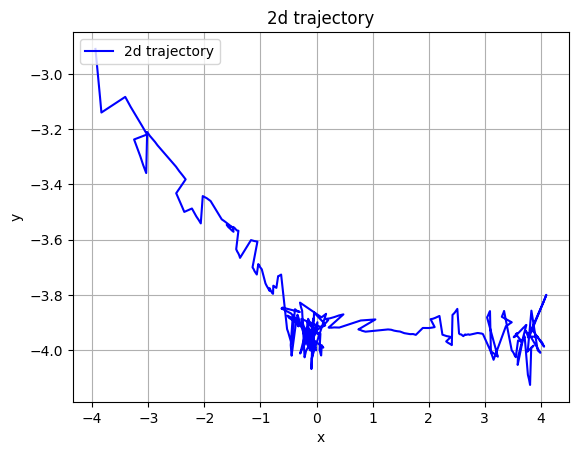

In [94]:
# 2d trajectory
plt.figure()
plt.plot(x_time, y_time, label='2d trajectory', c="b")
plt.title('2d trajectory')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper left')
plt.grid()

# **Part 2: Linear Regression**



In this part, the aim is to build a map of the environment by combining the position of the robot with the measurements of the 2D **LIDAR** that is on-board of the robot. The LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is, 
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. The sample time is the same, that is, $h=0.1\,s$, but the LIDAR measurements are outputted every time step $t=0,0.5,1.0, 1.5, \ldots$ (in seconds) like the robot position in the previous exercise. Moreover, if there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. It may also happen that the LIDAR in some cases may output an *outlier*.

The next figure shows $r_t$ as a function of the angle $\beta$ for $t=5.0\,s$.

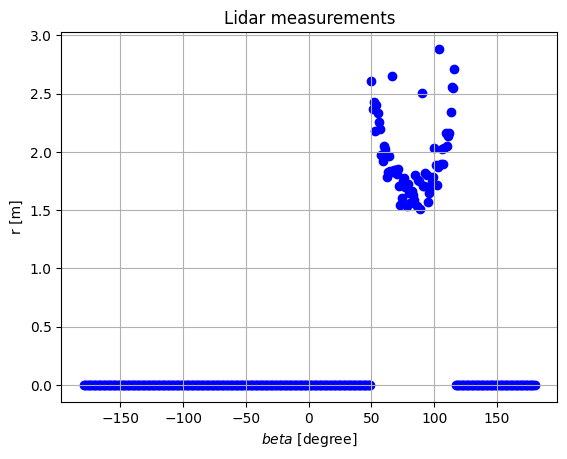

In [95]:

time = df["time"].values
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

t=5*10 # t = 5 sec * 1/sample_time
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid()



**2.1**
Using the estimated position of the robot (computed in the previous exercise) and the LIDAR data, 
1. Obtain the cloud points in the 2D plan that the robot sense at **$t=5\,s$** and plot them. Do not forget to remove the zero ranges and note that  

$$
\begin{align*}
\hat x_{o,t} = \hat x_t + r_t \cos\beta \\
\hat y_{o,t} = \hat y_t + r_t \sin\beta
\end{align*}
$$

2. Perform a linear regression for the previous data using a model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x } 
 \end{equation}
and display the results, that is, display the resulting 2d map, the mean square error, and the optimal parameters for $\color{green} \theta$. To this end, apply the related Least Square (LS) normal equations and **only use** the sklearn to confirm the obtained values.



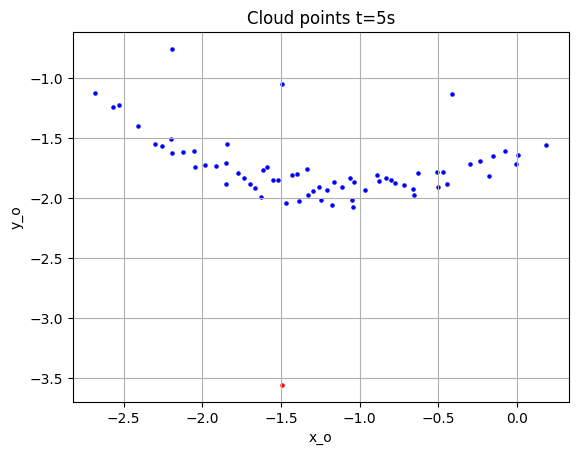

In [106]:
# Part 2.1.1
import math
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

#Build the cloud points in 2D plan
x_o, y_o = [], []
angle = np.linspace(-179, 180, num=360)

t=5*10   # t = 5 sec * 1/sample_time

for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(x_time[t]+Lidar_range[t][i]*np.cos(angle[i]*math.pi/180))
    y_o.append(y_time[t]+Lidar_range[t][i]*np.sin(angle[i]*math.pi/180))

plt.figure()
plt.scatter(x_o, y_o, color='b',s=5)
plt.scatter(x_time[t], y_time[t], color='r',s=5)
plt.title('Cloud points t=5s')
plt.ylabel('y_o')
plt.xlabel('x_o')
plt.grid()


Training:
 (67, 2)
Label:
 (67, 1)
 Linear Regression 
Parameters theta =
 [[-1.89576421]
 [-0.12289806]]


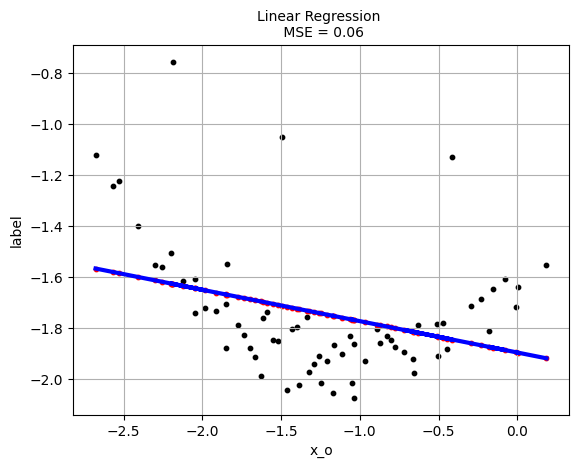

Coef =  [[-0.12289806]]
Intercept =  [-1.89576421]


In [108]:
# Part 2.1.2

# Linear regression

import numpy as np
from scipy import linalg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

x_o_mat = np.array(x_o).reshape(len(x_o),1)

#Create X matrix with ones
X = np.ones((len(x_o), 1), dtype=float)
X = np.concatenate((X, x_o_mat), axis = 1)
#Create Y matrix

Y = np.array(y_o).reshape(len(y_o),1)

print("Training:\n", X.shape)
print("Label:\n", Y.shape)

print(" Linear Regression ")

# Normal Equation: (X.t X)^-1 X.t Y
theta = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ Y

print("Parameters theta =\n", theta)


# Singular Value Decomposition (SVD) of the matrix (X.t X)
M = np.transpose(X) @ X 
u, s, vh = np.linalg.svd(M, full_matrices=True)
 
# Precticted values
Y_predict = X @ theta

#Model's error
MSE = mean_squared_error(Y, Y_predict)

### Plot
plt.scatter(x_o, Y, color="black",s=10)
plt.scatter(x_o,Y_predict,color="red",s=10)
plt.plot(x_o, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}'.format(round(MSE,2))
plt.title("Linear Regression \n " + title, fontsize=10)
plt.xlabel('x_o')
plt.ylabel('label')
plt.show()


# Using sklearn 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.LinearRegression()
model.fit(x_o_mat, Y)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)


**2.2**
Repeat the previous exercise but now with a polynomial model of the type
\begin{equation} \color{green} { y = \theta_0 + \theta_1 x + \theta_2 x^2 } 
 \end{equation}



Training:
 (67, 3)
Label:
 (67, 1)
 Linear Regression 
Parameters theta =
 [[-1.59080603]
 [ 0.59737324]
 [ 0.28829671]]


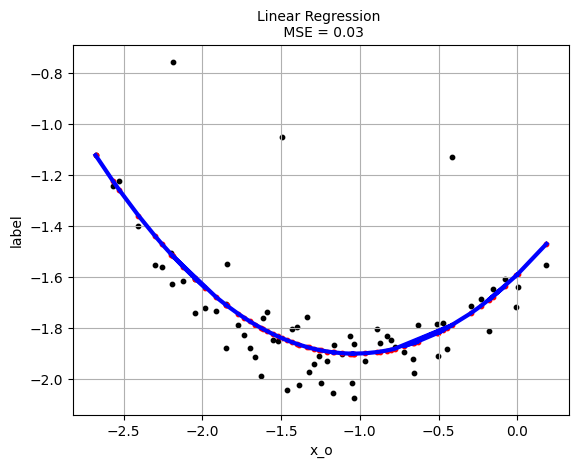

Coef =  [[0.59737324 0.28829671]]
Intercept =  [-1.59080603]


In [109]:
# Linear regression

import numpy as np
from scipy import linalg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

x_o_squared=np.array(x_o).reshape(len(x_o),1) ** 2

#Create X matrix with ones
X = np.ones((len(x_o), 1), dtype=float)
X = np.concatenate((X, np.array(x_o).reshape(len(x_o),1)), axis = 1)
X = np.concatenate((X, x_o_squared), axis = 1)

#Create Y matrix

Y = np.array(y_o).reshape(len(y_o),1)

print("Training:\n", X.shape)
print("Label:\n", Y.shape)

print(" Linear Regression ")

# Normal Equation: (X.t X)^-1 X.t Y
theta = np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X) @ Y

print("Parameters theta =\n", theta)


# Singular Value Decomposition (SVD) of the matrix (X.t X)
M = np.transpose(X) @ X 
u, s, vh = np.linalg.svd(M, full_matrices=True)
 
# Precticted values
Y_predict = X @ theta

#Model's error
MSE = mean_squared_error(Y, Y_predict)

### Plot
plt.scatter(x_o, Y, color="black",s=10)
plt.scatter(x_o,Y_predict,color="red",s=10)
plt.plot(x_o, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}'.format(round(MSE,2))
plt.title("Linear Regression \n " + title, fontsize=10)
plt.xlabel('x_o')
plt.ylabel('label')
plt.show()


# Using sklearn 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

nb_degree=2
polynomial_feats = PolynomialFeatures(degree=nb_degree)
X_TRANSF = polynomial_feats.fit_transform(np.array(x_o).reshape(len(x_o),1))
model = linear_model.LinearRegression()
model.fit(X_TRANSF[:,[1,2]], Y)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)


**2.3**
At this point you can use sklearn! 
Do the same as the previous exercise (polynomial model) but now with **degree 10**. Moreover, implement also a regression with **Ridge** regularization and a regression with **LASSO** regularization. Do not forget to display the obtained results. What can you conclude?




===== LINEAR REGRESSION =====
MSE (Linear Regression Model): 0.030178196986808632
Coef =  [[  0.30669979   2.22725664   1.92791742 -16.6140553  -43.47480896
  -46.5840529  -26.61588991  -8.47669241  -1.41584214  -0.09624344]]
Intercept =  [-1.66881242]


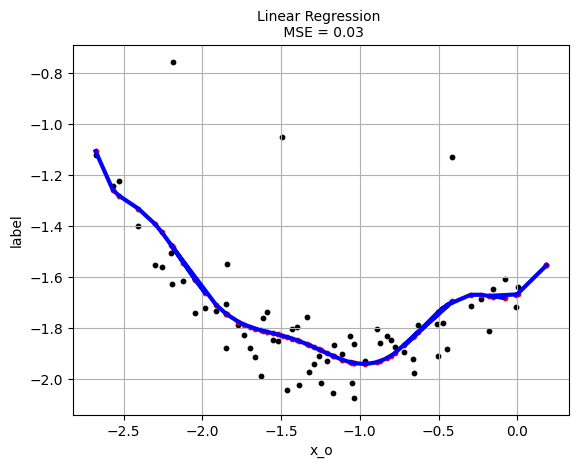

===== RIDGE =====
MSE (Ridge Model): 0.031016081530306515
Coef =  [[ 0.22781657 -0.17015704  0.01219068  0.1144364  -0.08854442 -0.0357167
   0.07874544  0.06264555  0.01718534  0.00165837]]
Intercept =  [-1.62883439]


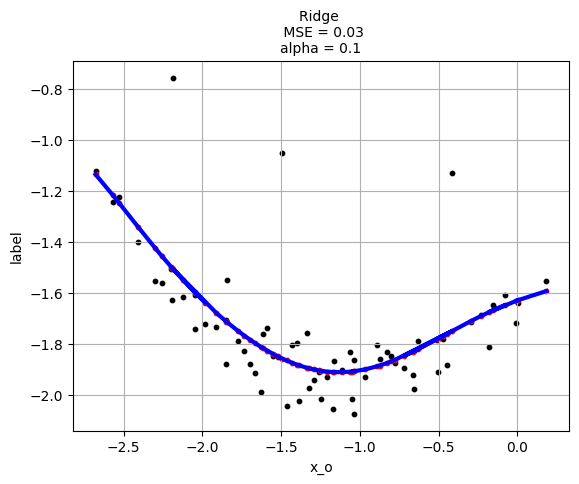

c:\Users\comas\venvpy3107\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.020e+00, tolerance: 4.299e-04
  model = cd_fast.enet_coordinate_descent(


===== LASSO =====
MSE (Lasso Model): 0.031218492877368963
Coef =  [ 3.29770661e-01 -0.00000000e+00 -5.23157429e-02  2.11869787e-02
 -0.00000000e+00 -5.02892008e-04  3.66102790e-04 -7.64076135e-05
  7.38985270e-06  4.10852162e-06]
Intercept =  [-1.63202786]


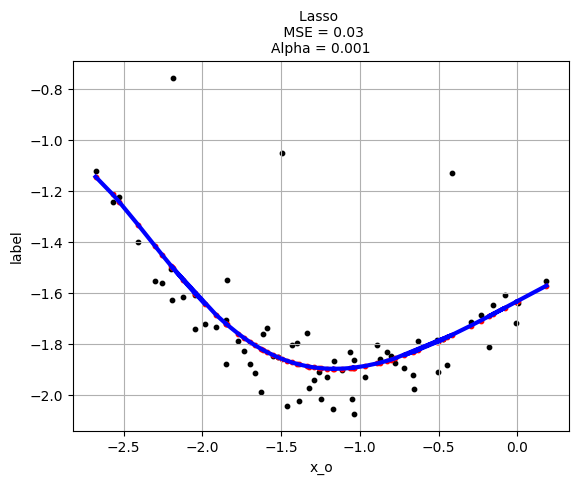

In [115]:
# Using sklearn 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso



nb_degree=10
polynomial_feats = PolynomialFeatures(degree=nb_degree)
X_TRANSF = polynomial_feats.fit_transform(np.array(x_o).reshape(len(x_o),1))
Y = np.array(y_o).reshape(len(y_o),1)

# LINEAR REGRESSION
model = linear_model.LinearRegression()
model.fit(X_TRANSF[:,1:11], Y)
Y_predict = model.predict(X_TRANSF[:,1:11])
MSE = mean_squared_error(Y,Y_predict)
print("===== LINEAR REGRESSION =====")
print("MSE (Linear Regression Model):", MSE)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

plt.scatter(x_o, Y, color="black",s=10)
plt.scatter(x_o,Y_predict,color="red",s=10)
plt.plot(x_o, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}'.format(round(MSE,2))
plt.title("Linear Regression \n " + title, fontsize=10)
plt.xlabel('x_o')
plt.ylabel('label')
plt.show()

# Using Ridge
alpha_ridge = 0.1
model = Ridge(alpha_ridge)
model.fit(X_TRANSF[:,1:11], Y)
Y_predict = model.predict(X_TRANSF[:,1:11])
MSE = mean_squared_error(Y,Y_predict)

print("===== RIDGE =====")
print("MSE (Ridge Model):",MSE)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

plt.scatter(x_o, Y, color="black",s=10)
plt.scatter(x_o,Y_predict,color="red",s=10)
plt.plot(x_o, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}\n'.format(round(MSE,2))
alpha = 'alpha = {}'.format(alpha_ridge)
plt.title("Ridge \n " + title + alpha, fontsize=10)
plt.xlabel('x_o')
plt.ylabel('label')
plt.show()

# Using Lasso
alpha_lasso = 0.001
model = Lasso(alpha_lasso)
model.fit(X_TRANSF[:,1:11], Y)
Y_predict = model.predict(X_TRANSF[:,1:11])
MSE = mean_squared_error(Y,Y_predict)

print("===== LASSO =====")
print("MSE (Lasso Model):", MSE)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

plt.scatter(x_o, Y, color="black",s=10)
plt.scatter(x_o,Y_predict,color="red",s=10)
plt.plot(x_o, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}\n'.format(round(MSE,2))
alpha = 'Alpha = {}'.format(alpha_lasso)
plt.title("Lasso \n " + title + alpha, fontsize=10)
plt.xlabel('x_o')
plt.ylabel('label')
plt.show()




Without using normalization the regression curve is more "wavy" and tries to fit perfectly some of the training samples. Using regularization instead we obtain a smoother curve that represents better the points cloud's shape.

**2.4**
We now would like to use all the LIDAR data. One simple option (off-line) is to make a data set with all the cloud point positions in 2D and apply the linear regression techniques.

Using sklearn, do this for LS, LS+Ridge, LS+LASSO using the polynomial model of degree 10. Display the results (map 2D) and the optimal values for 
$\color{green} \theta$.


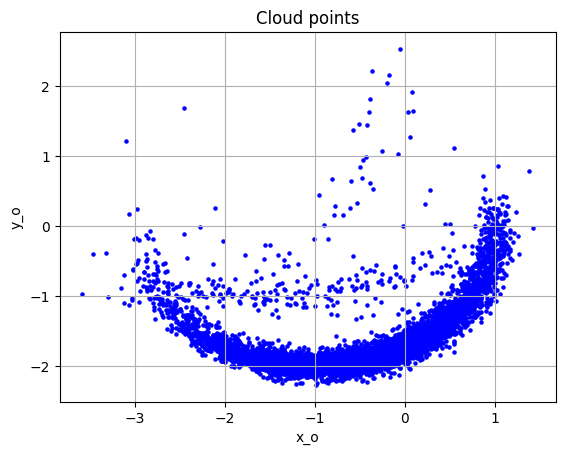

In [117]:
import math

Lidar_range = df.iloc[:, np.arange(5,365,1)].values

#Build the cloud points in 2D plan with ALL LIDAR DATA 
x_o, y_o = [], []
angle = np.linspace(-179, 180, num=360)
for t in range(len(Lidar_range)):
    for i in range(len(Lidar_range[t])):
        if Lidar_range[t][i] > 0:
            x_o.append(x_time[t]+Lidar_range[t][i]*np.cos(angle[i]*math.pi/180))
            y_o.append(y_time[t]+Lidar_range[t][i]*np.sin(angle[i]*math.pi/180))

x_o, y_o = zip(*sorted(zip(x_o, y_o)))
plt.figure()
plt.scatter(x_o, y_o, color='b',s=5)
plt.title('Cloud points')
plt.ylabel('y_o')
plt.xlabel('x_o')
plt.grid()


===== LINEAR REGRESSION =====
MSE (Linear Regression Model): 0.11580897766927771
Coef =  [[ 0.42828006  0.24095544  0.51587427  0.48727309 -0.11069563 -0.26444757
  -0.06472571  0.02348991  0.01184649  0.00132205]]
Intercept =  [-1.65055228]


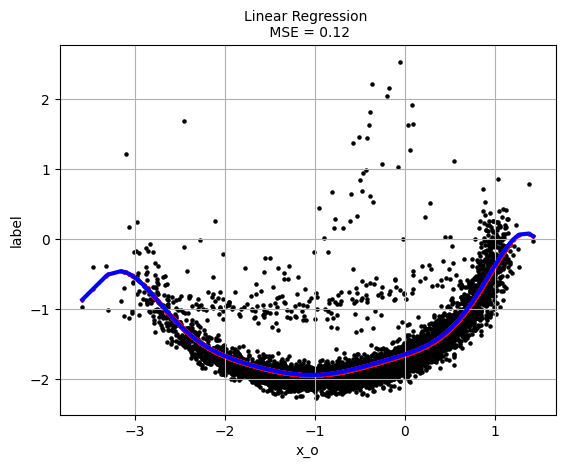

===== RIDGE =====
MSE (Ridge Model): 0.11580912996739164
Coef =  [[ 0.43070652  0.24169839  0.50667057  0.48248837 -0.10272716 -0.25832865
  -0.06561795  0.02158162  0.0112574   0.00126428]]
Intercept =  [-1.65052779]


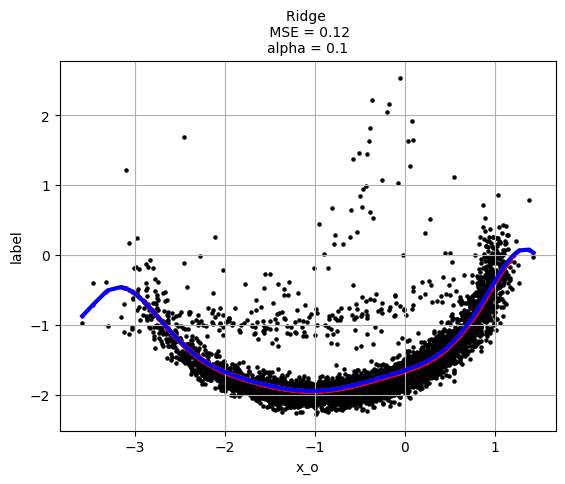

===== LASSO =====
MSE (Lasso Model): 0.11653587355334957
Coef =  [ 5.58426492e-01  4.26972624e-01  1.77828294e-01  5.24002926e-02
  2.51696271e-03  1.07560680e-03 -4.42951419e-05  1.37983826e-06
  1.55434980e-05 -8.29829262e-06]
Intercept =  [-1.66042301]


c:\Users\comas\venvpy3107\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.368e+02, tolerance: 1.558e-01
  model = cd_fast.enet_coordinate_descent(


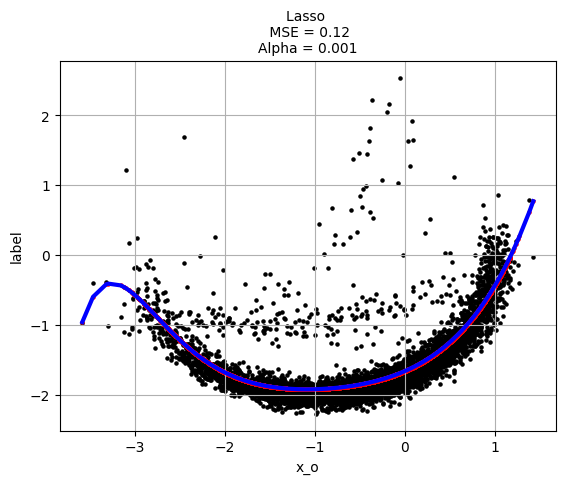

In [119]:
# Using sklearn 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso



nb_degree=10
polynomial_feats = PolynomialFeatures(degree=nb_degree)
X_TRANSF = polynomial_feats.fit_transform(np.array(x_o).reshape(len(x_o),1))
Y = np.array(y_o).reshape(len(y_o),1)

# LINEAR REGRESSION
model = linear_model.LinearRegression()
model.fit(X_TRANSF[:,1:11], Y)
Y_predict = model.predict(X_TRANSF[:,1:11])
MSE = mean_squared_error(Y,Y_predict)
print("===== LINEAR REGRESSION =====")
print("MSE (Linear Regression Model):", MSE)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

plt.scatter(x_o, Y, color="black",s=5)
plt.scatter(x_o,Y_predict,color="red",s=5)
plt.plot(x_o, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}'.format(round(MSE,2))
plt.title("Linear Regression \n " + title, fontsize=10)
plt.xlabel('x_o')
plt.ylabel('label')
plt.show()

# Using Ridge
alpha_ridge = 0.1
model = Ridge(alpha_ridge)
model.fit(X_TRANSF[:,1:11], Y)
Y_predict = model.predict(X_TRANSF[:,1:11])
MSE = mean_squared_error(Y,Y_predict)

print("===== RIDGE =====")
print("MSE (Ridge Model):",MSE)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

plt.scatter(x_o, Y, color="black",s=5)
plt.scatter(x_o,Y_predict,color="red",s=5)
plt.plot(x_o, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}\n'.format(round(MSE,2))
alpha = 'alpha = {}'.format(alpha_ridge)
plt.title("Ridge \n " + title + alpha, fontsize=10)
plt.xlabel('x_o')
plt.ylabel('label')
plt.show()

# Using Lasso
alpha_lasso = 0.001
model = Lasso(alpha_lasso)
model.fit(X_TRANSF[:,1:11], Y)
Y_predict = model.predict(X_TRANSF[:,1:11])
MSE = mean_squared_error(Y,Y_predict)

print("===== LASSO =====")
print("MSE (Lasso Model):", MSE)
print("Coef = ", model.coef_)
print("Intercept = ", model.intercept_)

plt.scatter(x_o, Y, color="black",s=5)
plt.scatter(x_o,Y_predict,color="red",s=5)
plt.plot(x_o, Y_predict,  color="blue", linewidth=3)
plt.grid()

title = 'MSE = {}\n'.format(round(MSE,2))
alpha = 'Alpha = {}'.format(alpha_lasso)
plt.title("Lasso \n " + title + alpha, fontsize=10)
plt.xlabel('x_o')
plt.ylabel('label')
plt.show()


**2.5 (Extra)** 
Another option (on-line) is to make a linear regression with only the LIDAR data that is being acquired at each snapshot of time $t=0, 0.5, 1.0, \ldots$ and update the optimal value $\color{green} \theta$ using a gradient descent rule
$$
\color{green}
{\theta_{t+1}=\theta_t - \gamma \nabla J(\theta_t),}
$$
where $\color{green} \gamma>0$ is the learning rate, and $\color{green}
 {\nabla J(\theta_{t})}$ is the gradient at each snapshot of the cost
$$
\color{green}
{J(\theta) = \sum_{n=1}^N \big(y_n-\theta^{T} \phi(x_n)\big)^2 }
$$
where $N$ is the number of valid (that is non zero) range measurements at instant $t$.

Implement this strategy and plot the results.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

Itr  0  Loss  2.0180027613092353
Itr  1  Loss  1.4261721768698596
Itr  2  Loss  0.8365017486555119
Itr  3  Loss  0.6000448218529887
Itr  4  Loss  1.3475500434950944
Itr  5  Loss  0.8152504343649359
Itr  6  Loss  0.2798294894883082
Itr  7  Loss  2.5638745038132478
Itr  8  Loss  2.710714339059381
Itr  9  Loss  1.8932716878353262
Itr  10  Loss  1.5754513230890352
Itr  11  Loss  1.5595868065546048
Itr  12  Loss  1.870036297077514
Itr  13  Loss  1.7771500666706492
Itr  14  Loss  2.3483735661338425
Itr  15  Loss  2.137515925915803
Itr  16  Loss  2.0484722266154582
Itr  17  Loss  1.8360901637480942
Itr  18  Loss  1.628160380715086
Itr  19  Loss  1.865601319037905
Itr  20  Loss  1.5068316459601732
Itr  21  Loss  1.9008906836432486
Itr  22  Loss  2.617963989094242
Itr  23  Loss  2.066996192991134
Itr  24  Loss  1.763185225618745
Itr  25  Loss  1.4236178989855766
Itr  26  Loss  3.267357528693669
Itr  27  Loss  3.0151980403896363
Itr  28  Loss  1.891923674672703
Itr  29  Loss  2.3567042436505012


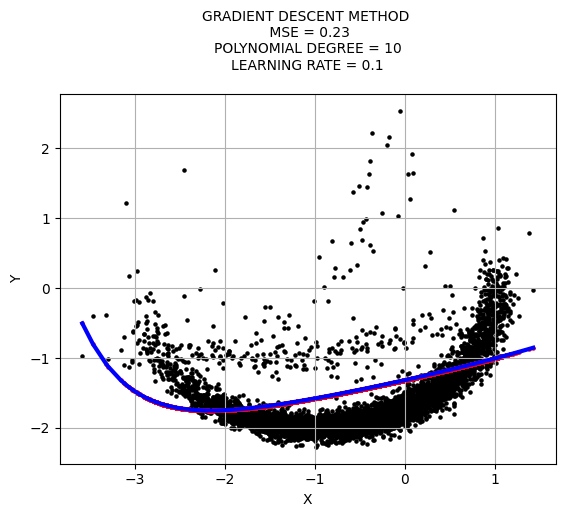

In [141]:
from sklearn.preprocessing import MinMaxScaler

# normalization
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
init_l_rate = 0.1
l_rate = init_l_rate
n_epochs = len(df) / 5
nb_degree=10

theta = np.ones((nb_degree+1,1)) * 0

factor_low = 0.2
factor_high = 1.1

for itr in range(int(n_epochs)):
    # time istant
    t = itr * 5

    # for each istant i compute x_o and y_o
    x_o_n, y_o_n = [],[]
    for i in range(len(Lidar_range[t])):
        if Lidar_range[t][i] > 0:
            x_o_n.append(x_time[t]+Lidar_range[t][i]*np.cos(angle[i]*math.pi/180))
            y_o_n.append(y_time[t]+Lidar_range[t][i]*np.sin(angle[i]*math.pi/180))
    
    # I get X and Y matrixes and i normalize them
    polynomial_feats = PolynomialFeatures(degree=nb_degree)
    X_TRANSF = scaler_x.fit_transform(polynomial_feats.fit_transform(np.array(x_o_n).reshape(len(x_o_n),1)))
    Y = scaler_y.fit_transform( np.array(y_o_n).reshape(len(y_o_n),1))
    # I compute theta
    theta_base = theta
    Y_predict = X_TRANSF @ theta_base
    Y_residuals = np.subtract(Y_predict,Y)
    Loss = np.sum((Y_residuals**2))
    #grad_loss = 2 * np.transpose(X_TRANSF) @ Y_predict - 2 * np.transpose(X_TRANSF)  @ Y
    grad_loss = -2 * X_TRANSF.T @ (Y - X_TRANSF @ theta)
    grad_loss = np.reshape(grad_loss, (X_TRANSF.shape[1],1))
    theta_new= theta_base - l_rate*grad_loss

    # Compute the new loss to adjust learning rate
    Y_pred_new = X_TRANSF @ theta_new
    Y_residuals_new = np.subtract(Y_pred_new,Y)
    Loss_new = np.sum((Y_residuals_new**2))

    if(Loss_new >= Loss) :
        # if the loss with computed theta is >= than the previous loss
        # we lower the learning rate
        while Loss_new >= Loss:
            l_rate *= factor_low
            # compute new theta with new lr
            theta_new = theta_base - l_rate*grad_loss
            Y_pred_new = X_TRANSF @ theta_new
            Y_residuals_new = np.subtract(Y_pred_new,Y)
            # Compute new loss
            Loss_new = np.sum((Y_residuals_new**2))
            # While the new loss is >= than the previous one
            # we continue lowering the l_rate
    else :
        # if the new Loss is < previous loss
        while True :
            # we increase l_rate
            l_rate *= factor_high
            # compute a new theta
            theta_new_new = theta_base - l_rate*grad_loss
            Y_pred_new_new = X_TRANSF @ theta_new_new
            Y_residuals_new_new = np.subtract(Y_pred_new_new,Y)
            # compute a new loss
            Loss_new_new = np.sum((Y_residuals_new_new**2))
            # if the new loss < of the previous one we update theta
            # and we continue to increase theta till the new loss
            # is >= of the previous one
            if Loss_new_new >= Loss_new : break
            theta_new , Loss_new = theta_new_new, Loss_new_new
    
    theta = theta_new
    Loss = Loss_new
    print("Itr ",itr," Loss ",Loss)



X_TRANSF = scaler_x.fit_transform(polynomial_feats.fit_transform(np.array(x_o).reshape(len(x_o),1)))
Y = np.array(y_o).reshape(len(y_o),1)
Y_pred = scaler_y.inverse_transform(X_TRANSF @ theta)
MSE = mean_squared_error(Y,Y_pred)

plt.scatter(x_o, Y, color="black",s=5)
plt.scatter(x_o,Y_pred,color="red",s=5)
plt.plot(x_o, Y_pred,  color="blue", linewidth=3)
plt.grid()

print('THETA', theta)

title = 'MSE = {}\n'.format(round(MSE,2))
degree = 'POLYNOMIAL DEGREE = {}\n'.format(nb_degree)
lr = 'LEARNING RATE = {}\n'.format(init_l_rate)
plt.title("GRADIENT DESCENT METHOD \n " + title + degree + lr, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
